# Stream Flow Monitoring - Data Exploration and Transformation

From the [OD0145 Stream Flow Monitoring](https://data.princeedwardisland.ca/Environment-and-Food/OD0145-Stream-Flow-Monitoring/qgve-7whk) dataset on the Prince Edward Island Open Data Portal.

From the Portal: "Stream flow data are available for a number of streams across the province. New Stream flow data is available from June through September. Those who hold a Water Withdrawal for Irrigation Purposes Permit can use this tool to confirm the water flow in Island streams, and to determine whether they may legally draw water for irrigation purposes."

In [1]:
%matplotlib inline
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Style.
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../resources/OD0145_Stream_Flow_Monitoring.csv')
df.head()

,LocationName,Timestamp,Time,YearMonthDay,YearMonth,Year,RawFlow,MaintenanceFlow
0,Southwest River Site 2,09/06/2019 12:00:00 PM,2019-09-06 12:00,2019-09-06,2019-09,2019,0.273,0.147
1,Southwest River Site 2,09/30/2019 05:00:00 PM,2019-09-30 17:00,2019-09-30,2019-09,2019,0.533,0.147
2,Southwest River Site 2,09/05/2021 07:00:00 PM,2021-09-05 19:00,2021-09-05,2021-09,2021,0.507,0.147
3,Bradshaw River,07/01/2009 12:00:00 AM,2009-07-01 00:00,2009-07-01,2009-07,2009,0.369,0.230
4,Bradshaw River,07/01/2009 01:00:00 AM,2009-07-01 01:00,2009-07-01,2009-07,2009,0.371,0.230


In [3]:
# Check unique value counts.
df.nunique()

LocationName           8
Timestamp          61067
Time               61067
YearMonthDay        2579
YearMonth             98
Year                  13
RawFlow             4402
MaintenanceFlow       31
dtype: int64

In [4]:
# Get unique LocationNames and number of records per.
df_lc = pd.DataFrame({'LocationName': df['LocationName'].unique().tolist(),
              'Count': [df.loc[df['LocationName'] == x]['LocationName'].count() for x in df['LocationName'].unique().tolist()]}) \
        .set_index('LocationName').sort_values('Count', ascending=False)
df_lc.index.name = None
df_lc

,Count
Bradshaw River,48137
Dunk River,36825
Wilmot River,18938
Southwest River Site 2,17082
North Brook,15786
Southwest River Site 1,13711
Montague River,10586
Vernon River,10564


In [5]:
# Use Bradshaw River as first look.
df_brad = df.loc[df['LocationName'] == 'Bradshaw River']
df_brad.head()

,LocationName,Timestamp,Time,YearMonthDay,YearMonth,Year,RawFlow,MaintenanceFlow
3,Bradshaw River,07/01/2009 12:00:00 AM,2009-07-01 00:00,2009-07-01,2009-07,2009,0.369,0.23
4,Bradshaw River,07/01/2009 01:00:00 AM,2009-07-01 01:00,2009-07-01,2009-07,2009,0.371,0.23
5,Bradshaw River,07/01/2009 02:00:00 AM,2009-07-01 02:00,2009-07-01,2009-07,2009,0.369,0.23
6,Bradshaw River,07/01/2009 03:00:00 AM,2009-07-01 03:00,2009-07-01,2009-07,2009,0.368,0.23
7,Bradshaw River,07/01/2009 04:00:00 AM,2009-07-01 04:00,2009-07-01,2009-07,2009,0.369,0.23


In [6]:
# Check order is already sorted.
df.loc[df['LocationName'] == 'Bradshaw River'].sort_values('Time', ascending=True).equals(df.loc[df['LocationName'] == 'Bradshaw River'])

True

In [7]:
df_brad

,LocationName,Timestamp,Time,YearMonthDay,YearMonth,Year,RawFlow,MaintenanceFlow
3,Bradshaw River,07/01/2009 12:00:00 AM,2009-07-01 00:00,2009-07-01,2009-07,2009,0.369,0.23
4,Bradshaw River,07/01/2009 01:00:00 AM,2009-07-01 01:00,2009-07-01,2009-07,2009,0.371,0.23
5,Bradshaw River,07/01/2009 02:00:00 AM,2009-07-01 02:00,2009-07-01,2009-07,2009,0.369,0.23
6,Bradshaw River,07/01/2009 03:00:00 AM,2009-07-01 03:00,2009-07-01,2009-07,2009,0.368,0.23
7,Bradshaw River,07/01/2009 04:00:00 AM,2009-07-01 04:00,2009-07-01,2009-07,2009,0.369,0.23
...,...,...,...,...,...,...,...,...
48135,Bradshaw River,10/20/2021 04:00:00 AM,2021-10-20 04:00,2021-10-20,2021-10,2021,0.410,NaN
48136,Bradshaw River,10/20/2021 05:00:00 AM,2021-10-20 05:00,2021-10-20,2021-10,2021,0.423,NaN
48137,Bradshaw River,10/20/2021 06:00:00 AM,2021-10-20 06:00,2021-10-20,2021-10,2021,0.403,NaN
48138,Bradshaw River,10/20/2021 07:00:00 AM,2021-10-20 07:00,2021-10-20,2021-10,2021,0.419,NaN


In [8]:
# Group by YearMonthDay and find mean for that day.
df_brad_day = df_brad.groupby(['YearMonthDay']).mean()
df_brad_day.index.name = "Bradshaw River Day Group"
df_brad_day.head()

,Year,RawFlow,MaintenanceFlow
Bradshaw River Day Group,,,
2009-07-01,2009,0.355750,0.23
2009-07-02,2009,0.343458,0.23
2009-07-03,2009,0.326042,0.23
2009-07-04,2009,0.341083,0.23
2009-07-05,2009,0.386583,0.23


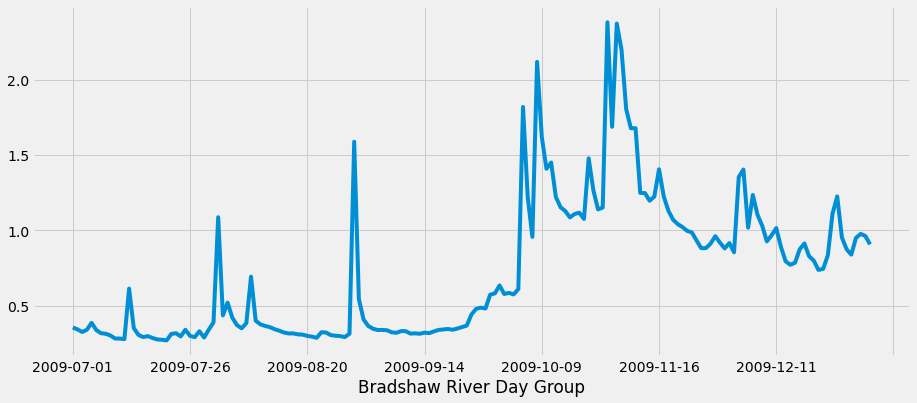

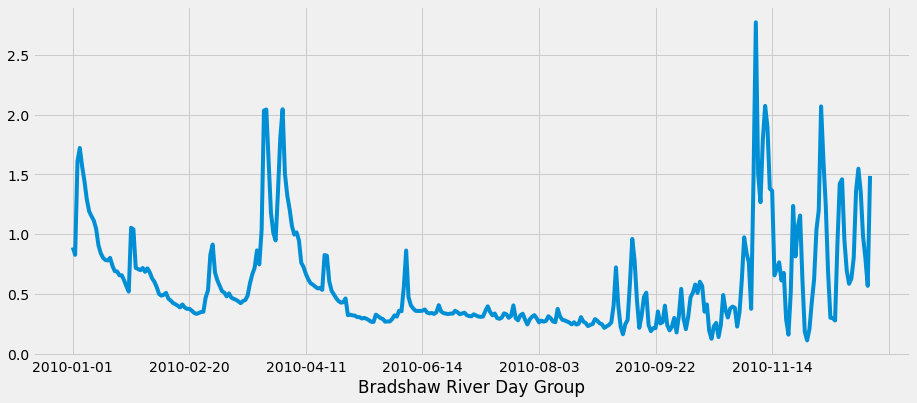

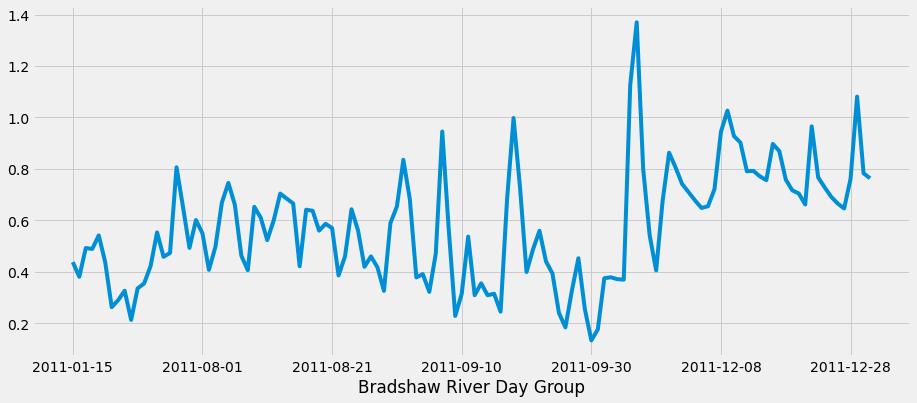

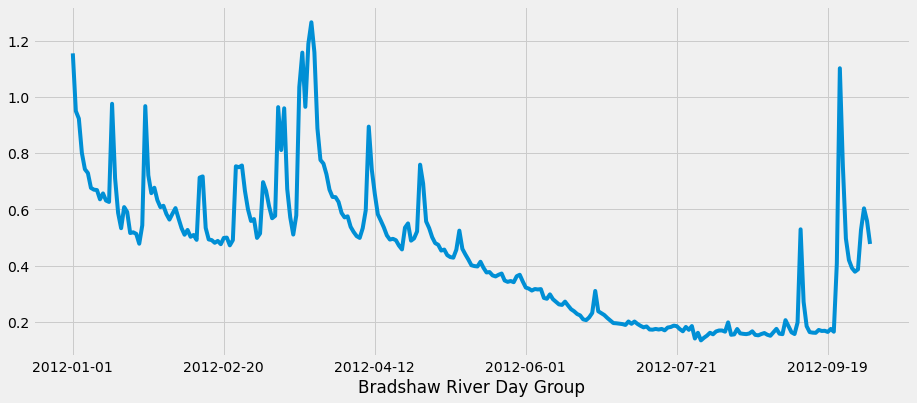

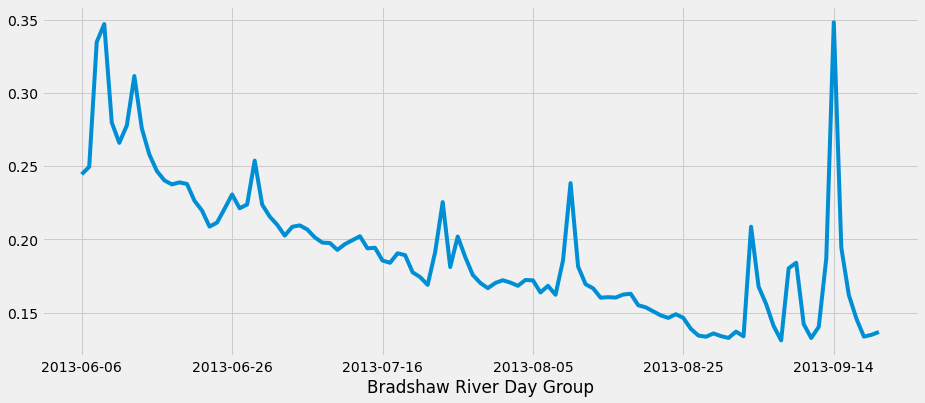

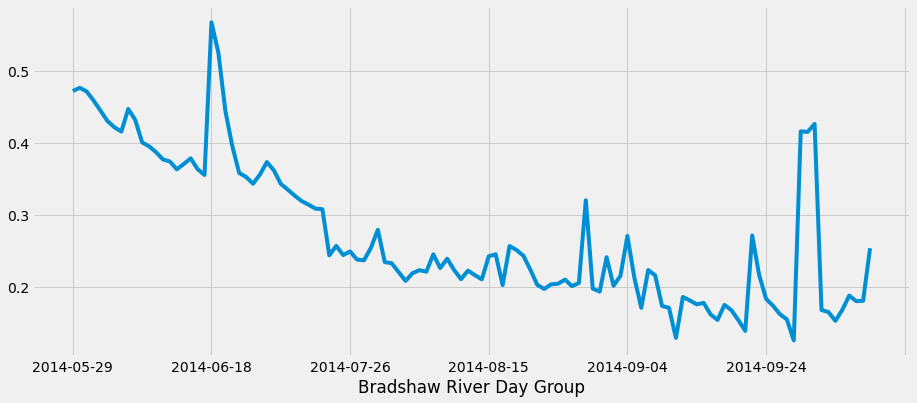

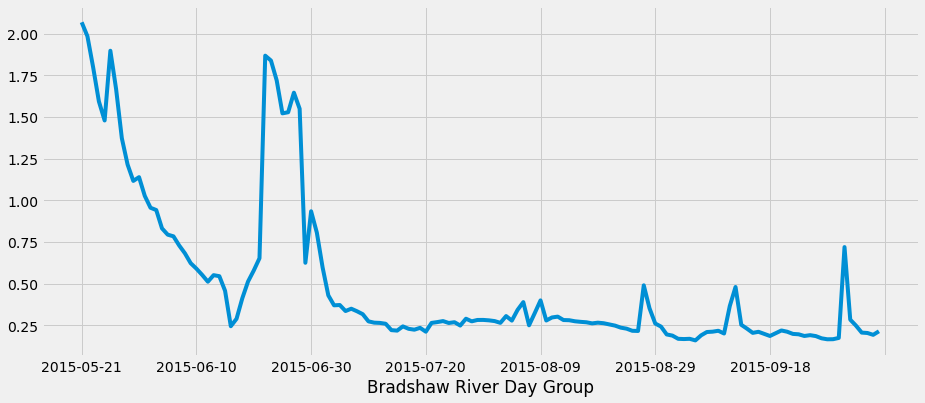

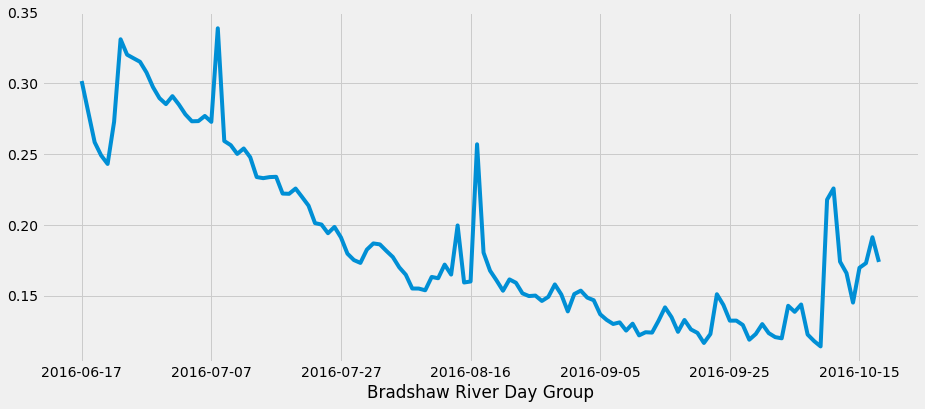

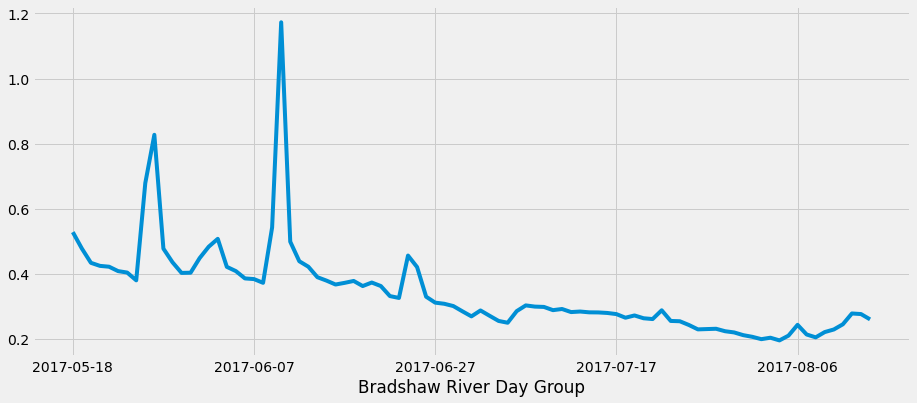

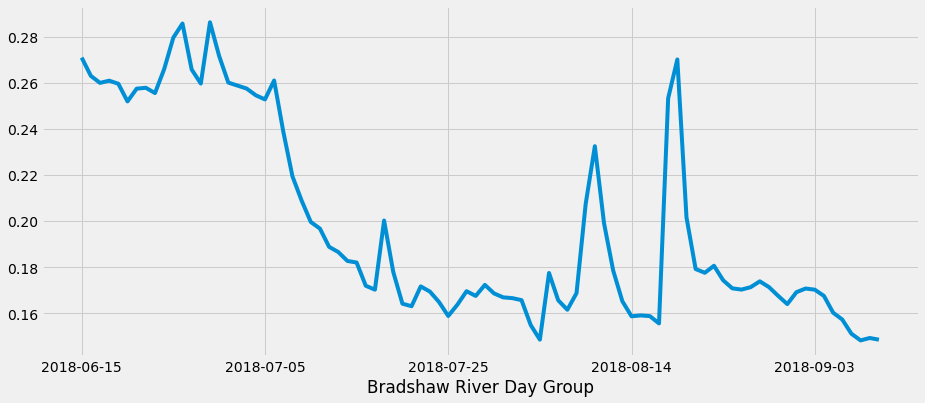

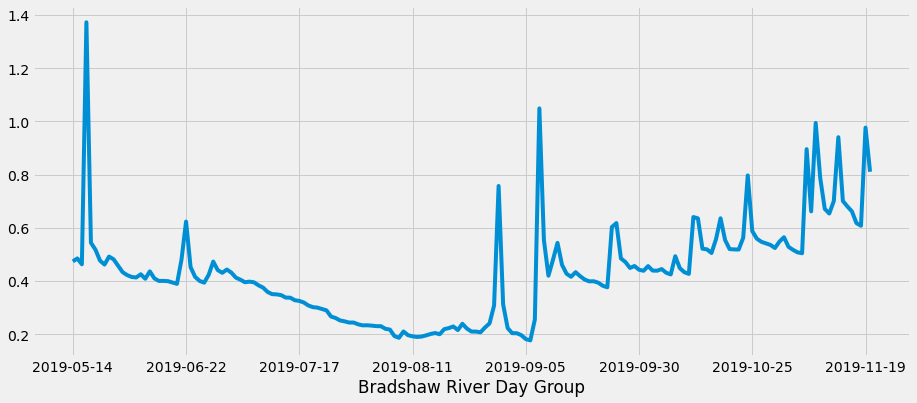

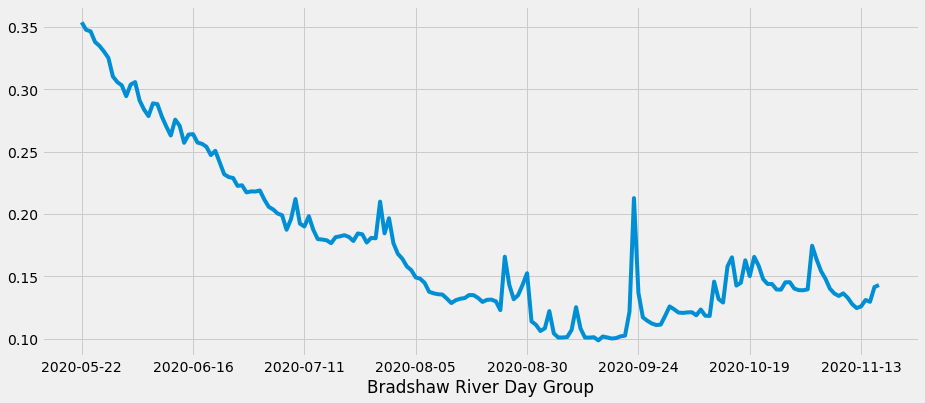

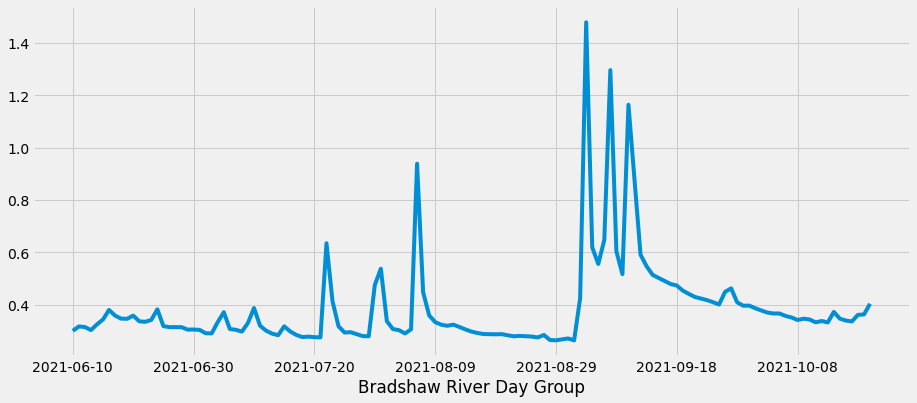

In [9]:
# Plot graphs of RawData by year.
for year in df_brad_day.Year.unique():
    df_brad_day[df_brad_day['Year'] == year].RawFlow.plot(figsize=(14,6))
    plt.show()